In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download learn-ai-bbc

  0% 0.00/1.85M [00:00<?, ?B/s]
100% 1.85M/1.85M [00:00<00:00, 113MB/s]


In [ ]:
!unzip learn-ai-bbc

Archive:  learn-ai-bbc.zip
  inflating: BBC News Sample Solution.csv  
  inflating: BBC News Test.csv       
  inflating: BBC News Train.csv      


In [ ]:
pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import digits

from sklearn.decomposition import NMF
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df_train = pd.read_csv('/content/BBC News Train.csv')
df_test = pd.read_csv('/content/BBC News Test.csv')
df_combined = pd.concat([df_train, df_test])
df_combined.drop('Category', axis = 1, inplace = True)
df_combined

,ArticleId,Text
0,1833,worldcom ex-boss launches defence lawyers defe...
1,154,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...
3,1976,lifestyle governs mobile choice faster bett...
4,917,enron bosses in $168m payout eighteen former e...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


In [ ]:
df_train.drop('Category', axis = 1, inplace = True)
df_train

,ArticleId,Text
0,1833,worldcom ex-boss launches defence lawyers defe...
1,154,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...
3,1976,lifestyle governs mobile choice faster bett...
4,917,enron bosses in $168m payout eighteen former e...
...,...,...
1485,857,double eviction from big brother model caprice...
1486,325,dj double act revamp chart show dj duo jk and ...
1487,1590,weak dollar hits reuters revenues at media gro...
1488,1587,apple ipod family expands market apple has exp...


In [ ]:
def clean_text(df, text_col):
  df['remove_punctuations'] = df[text_col].apply( lambda row : re.sub(r'[^\w\s]+', ' ', row))
  df['rem_nos'] = df['remove_punctuations'].apply( lambda row : re.sub(r'[0-9]+', ' ', row))
  stop_words = stopwords.words('english')
  df['rem_stopwords'] = df['rem_nos'].apply( lambda x : ' '.join([word for word in x.split() if word not in (stop_words)]))
  df['clean_text'] = df['rem_stopwords'].apply( lambda x : re.sub( r'\+', ' ', x))
  return

In [ ]:
clean_text(df_combined, 'Text')
df_combined

,ArticleId,Text,remove_punctuations,rem_nos,rem_stopwords,clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens maj...,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster better ...,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,enron bosses in 168m payout eighteen former e...,enron bosses in m payout eighteen former enr...,enron bosses payout eighteen former enron dire...,enron bosses payout eighteen former enron dire...
...,...,...,...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,eu to probe alitalia state aid the european ...,eu to probe alitalia state aid the european ...,eu probe alitalia state aid european commissio...,eu probe alitalia state aid european commissio...
731,373,u2 to play at grammy awards show irish rock ba...,u2 to play at grammy awards show irish rock ba...,u to play at grammy awards show irish rock ba...,u play grammy awards show irish rock band u pl...,u play grammy awards show irish rock band u pl...
732,1704,sport betting rules in spotlight a group of mp...,sport betting rules in spotlight a group of mp...,sport betting rules in spotlight a group of mp...,sport betting rules spotlight group mps peers ...,sport betting rules spotlight group mps peers ...
733,206,alfa romeos to get gm engines fiat is to sto...,alfa romeos to get gm engines fiat is to sto...,alfa romeos to get gm engines fiat is to sto...,alfa romeos get gm engines fiat stop making si...,alfa romeos get gm engines fiat stop making si...


In [ ]:
clean_text(df_train, 'Text')
df_train

,ArticleId,Text,remove_punctuations,rem_nos,rem_stopwords,clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens maj...,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster better ...,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,enron bosses in 168m payout eighteen former e...,enron bosses in m payout eighteen former enr...,enron bosses payout eighteen former enron dire...,enron bosses payout eighteen former enron dire...
...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,double eviction from big brother model caprice...,double eviction from big brother model caprice...,double eviction big brother model caprice holb...,double eviction big brother model caprice holb...
1486,325,dj double act revamp chart show dj duo jk and ...,dj double act revamp chart show dj duo jk and ...,dj double act revamp chart show dj duo jk and ...,dj double act revamp chart show dj duo jk joel...,dj double act revamp chart show dj duo jk joel...
1487,1590,weak dollar hits reuters revenues at media gro...,weak dollar hits reuters revenues at media gro...,weak dollar hits reuters revenues at media gro...,weak dollar hits reuters revenues media group ...,weak dollar hits reuters revenues media group ...
1488,1587,apple ipod family expands market apple has exp...,apple ipod family expands market apple has exp...,apple ipod family expands market apple has exp...,apple ipod family expands market apple expande...,apple ipod family expands market apple expande...


In [ ]:
wordnet_lemmatizer=WordNetLemmatizer()
def lemmatizer(text):
  lem = [wordnet_lemmatizer.lemmatize(word.lower()) for word in text]
  return lem

def tokenize_lemmatize(df, text_col):
  df['tokenized'] = df.apply(lambda row : nltk.word_tokenize(row[text_col]), axis = 1)
  df['lemmatized'] = df['tokenized'].apply(lambda string : lemmatizer(string))
  return

In [ ]:
tokenize_lemmatize(df_combined , 'clean_text')
df_combined

,ArticleId,Text,remove_punctuations,rem_nos,rem_stopwords,clean_text,tokenized,lemmatized
0,1833,worldcom ex-boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,"[worldcom, ex, boss, launches, defence, lawyer...","[worldcom, ex, bos, launch, defence, lawyer, d..."
1,154,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slide, german, ..."
2,1101,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens maj...,bbc poll indicates economic gloom citizens maj...,"[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indicates, economic, gloom, citize..."
3,1976,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster better ...,lifestyle governs mobile choice faster better ...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,enron bosses in 168m payout eighteen former e...,enron bosses in m payout eighteen former enr...,enron bosses payout eighteen former enron dire...,enron bosses payout eighteen former enron dire...,"[enron, bosses, payout, eighteen, former, enro...","[enron, boss, payout, eighteen, former, enron,..."
...,...,...,...,...,...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,eu to probe alitalia state aid the european ...,eu to probe alitalia state aid the european ...,eu probe alitalia state aid european commissio...,eu probe alitalia state aid european commissio...,"[eu, probe, alitalia, state, aid, european, co...","[eu, probe, alitalia, state, aid, european, co..."
731,373,u2 to play at grammy awards show irish rock ba...,u2 to play at grammy awards show irish rock ba...,u to play at grammy awards show irish rock ba...,u play grammy awards show irish rock band u pl...,u play grammy awards show irish rock band u pl...,"[u, play, grammy, awards, show, irish, rock, b...","[u, play, grammy, award, show, irish, rock, ba..."
732,1704,sport betting rules in spotlight a group of mp...,sport betting rules in spotlight a group of mp...,sport betting rules in spotlight a group of mp...,sport betting rules spotlight group mps peers ...,sport betting rules spotlight group mps peers ...,"[sport, betting, rules, spotlight, group, mps,...","[sport, betting, rule, spotlight, group, mp, p..."
733,206,alfa romeos to get gm engines fiat is to sto...,alfa romeos to get gm engines fiat is to sto...,alfa romeos to get gm engines fiat is to sto...,alfa romeos get gm engines fiat stop making si...,alfa romeos get gm engines fiat stop making si...,"[alfa, romeos, get, gm, engines, fiat, stop, m...","[alfa, romeo, get, gm, engine, fiat, stop, mak..."


In [ ]:
tokenize_lemmatize(df_train , 'clean_text')
df_train

,ArticleId,Text,remove_punctuations,rem_nos,rem_stopwords,clean_text,tokenized,lemmatized
0,1833,worldcom ex-boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,"[worldcom, ex, boss, launches, defence, lawyer...","[worldcom, ex, bos, launch, defence, lawyer, d..."
1,154,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slide, german, ..."
2,1101,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens maj...,bbc poll indicates economic gloom citizens maj...,"[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indicates, economic, gloom, citize..."
3,1976,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster better ...,lifestyle governs mobile choice faster better ...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,enron bosses in 168m payout eighteen former e...,enron bosses in m payout eighteen former enr...,enron bosses payout eighteen former enron dire...,enron bosses payout eighteen former enron dire...,"[enron, bosses, payout, eighteen, former, enro...","[enron, boss, payout, eighteen, former, enron,..."
...,...,...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,double eviction from big brother model caprice...,double eviction from big brother model caprice...,double eviction big brother model caprice holb...,double eviction big brother model caprice holb...,"[double, eviction, big, brother, model, capric...","[double, eviction, big, brother, model, capric..."
1486,325,dj double act revamp chart show dj duo jk and ...,dj double act revamp chart show dj duo jk and ...,dj double act revamp chart show dj duo jk and ...,dj double act revamp chart show dj duo jk joel...,dj double act revamp chart show dj duo jk joel...,"[dj, double, act, revamp, chart, show, dj, duo...","[dj, double, act, revamp, chart, show, dj, duo..."
1487,1590,weak dollar hits reuters revenues at media gro...,weak dollar hits reuters revenues at media gro...,weak dollar hits reuters revenues at media gro...,weak dollar hits reuters revenues media group ...,weak dollar hits reuters revenues media group ...,"[weak, dollar, hits, reuters, revenues, media,...","[weak, dollar, hit, reuters, revenue, medium, ..."
1488,1587,apple ipod family expands market apple has exp...,apple ipod family expands market apple has exp...,apple ipod family expands market apple has exp...,apple ipod family expands market apple expande...,apple ipod family expands market apple expande...,"[apple, ipod, family, expands, market, apple, ...","[apple, ipod, family, expands, market, apple, ..."


In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

def calculate_dunn_index(data, labels):
    """
    Calculate the Dunn Index for a given clustering.

    Parameters:
    data (numpy.ndarray): The dataset.
    labels (numpy.ndarray): The cluster labels for each data point.

    Returns:
    float: The Dunn Index.
    """
    # Calculate pairwise distances between data points
    distances = squareform(pdist(data))

    # Calculate intra-cluster distances (minimum distance between points in the same cluster)
    intra_cluster_distances = np.zeros(len(np.unique(labels)))
    for i, label in enumerate(np.unique(labels)):
        mask = labels == label
        cluster_distances = distances[mask][:, mask]
        intra_cluster_distances[i] = np.min(cluster_distances[np.nonzero(cluster_distances)])

    # Calculate inter-cluster distances (maximum distance between points in different clusters)
    inter_cluster_distances = []
    for i, label_i in enumerate(np.unique(labels)):
        for label_j in np.unique(labels)[i + 1:]:
            mask_i = labels == label_i
            mask_j = labels == label_j
            cluster_distances = distances[mask_i][:, mask_j]
            inter_cluster_distances.append(np.max(cluster_distances))

    # Dunn Index is the minimum inter-cluster distance divided by the maximum intra-cluster distance
    dunn_index = np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

    return dunn_index


In [ ]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
def word_embeddings_st(df, text_col):
  df['sentences_as_strings'] = df[text_col].apply( lambda tokens : " ".join(tokens))
  df['embeddings'] = df['sentences_as_strings'].apply( lambda sentence : model.encode(sentence))
  #df['embeddings'] = df[text_col].apply(lambda sentence : model.encode(sentence))
  return

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
word_embeddings_st(df_combined, 'lemmatized')
df_combined

,ArticleId,Text,remove_punctuations,rem_nos,rem_stopwords,clean_text,tokenized,lemmatized,sentences_as_strings,embeddings
0,1833,worldcom ex-boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,"[worldcom, ex, boss, launches, defence, lawyer...","[worldcom, ex, bos, launch, defence, lawyer, d...",worldcom ex bos launch defence lawyer defendin...,"[0.03322696, 0.06568444, -0.00020615652, -0.03..."
1,154,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slide, german, ...",german business confidence slide german busine...,"[-0.0120207695, 0.04359217, -0.021111906, 0.02..."
2,1101,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens maj...,bbc poll indicates economic gloom citizens maj...,"[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indicates, economic, gloom, citize...",bbc poll indicates economic gloom citizen majo...,"[-0.040599983, 0.100434355, -0.016162792, -0.0..."
3,1976,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster better ...,lifestyle governs mobile choice faster better ...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b...",lifestyle governs mobile choice faster better ...,"[0.018618524, -0.016609155, -0.03422233, -0.03..."
4,917,enron bosses in $168m payout eighteen former e...,enron bosses in 168m payout eighteen former e...,enron bosses in m payout eighteen former enr...,enron bosses payout eighteen former enron dire...,enron bosses payout eighteen former enron dire...,"[enron, bosses, payout, eighteen, former, enro...","[enron, boss, payout, eighteen, former, enron,...",enron boss payout eighteen former enron direct...,"[0.0009381332, 0.10890495, 0.006276443, 0.0107..."
...,...,...,...,...,...,...,...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,eu to probe alitalia state aid the european ...,eu to probe alitalia state aid the european ...,eu probe alitalia state aid european commissio...,eu probe alitalia state aid european commissio...,"[eu, probe, alitalia, state, aid, european, co...","[eu, probe, alitalia, state, aid, european, co...",eu probe alitalia state aid european commissio...,"[0.012371603, 0.055909667, -0.0072807632, 0.06..."
731,373,u2 to play at grammy awards show irish rock ba...,u2 to play at grammy awards show irish rock ba...,u to play at grammy awards show irish rock ba...,u play grammy awards show irish rock band u pl...,u play grammy awards show irish rock band u pl...,"[u, play, grammy, awards, show, irish, rock, b...","[u, play, grammy, award, show, irish, rock, ba...",u play grammy award show irish rock band u pla...,"[-0.028500447, 0.0164805, -0.03114999, 0.04994..."
732,1704,sport betting rules in spotlight a group of mp...,sport betting rules in spotlight a group of mp...,sport betting rules in spotlight a group of mp...,sport betting rules spotlight group mps peers ...,sport betting rules spotlight group mps peers ...,"[sport, betting, rules, spotlight, group, mps,...","[sport, betting, rule, spotlight, group, mp, p...",sport betting rule spotlight group mp peer cal...,"[-0.016217561, 0.015623706, -0.009892429, 0.01..."
733,206,alfa romeos to get gm engines fiat is to sto...,alfa romeos to get gm engines fiat is to sto...,alfa romeos to get gm engines fiat is to s

In [ ]:
word_embeddings_st(df_train, 'lemmatized')
df_train

,ArticleId,Text,remove_punctuations,rem_nos,rem_stopwords,clean_text,tokenized,lemmatized,sentences_as_strings,embeddings
0,1833,worldcom ex-boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,"[worldcom, ex, boss, launches, defence, lawyer...","[worldcom, ex, bos, launch, defence, lawyer, d...",worldcom ex bos launch defence lawyer defendin...,"[0.03322696, 0.06568444, -0.00020615652, -0.03..."
1,154,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slide, german, ...",german business confidence slide german busine...,"[-0.0120207695, 0.04359217, -0.021111906, 0.02..."
2,1101,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens maj...,bbc poll indicates economic gloom citizens maj...,"[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indicates, economic, gloom, citize...",bbc poll indicates economic gloom citizen majo...,"[-0.040599983, 0.100434355, -0.016162792, -0.0..."
3,1976,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster better ...,lifestyle governs mobile choice faster better ...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b...",lifestyle governs mobile choice faster better ...,"[0.018618524, -0.016609155, -0.03422233, -0.03..."
4,917,enron bosses in $168m payout eighteen former e...,enron bosses in 168m payout eighteen former e...,enron bosses in m payout eighteen former enr...,enron bosses payout eighteen former enron dire...,enron bosses payout eighteen former enron dire...,"[enron, bosses, payout, eighteen, former, enro...","[enron, boss, payout, eighteen, former, enron,...",enron boss payout eighteen former enron direct...,"[0.0009381332, 0.10890495, 0.006276443, 0.0107..."
...,...,...,...,...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,double eviction from big brother model caprice...,double eviction from big brother model caprice...,double eviction big brother model caprice holb...,double eviction big brother model caprice holb...,"[double, eviction, big, brother, model, capric...","[double, eviction, big, brother, model, capric...",double eviction big brother model caprice holb...,"[-0.012064302, -0.020571519, -0.004035834, -0...."
1486,325,dj double act revamp chart show dj duo jk and ...,dj double act revamp chart show dj duo jk and ...,dj double act revamp chart show dj duo jk and ...,dj double act revamp chart show dj duo jk joel...,dj double act revamp chart show dj duo jk joel...,"[dj, double, act, revamp, chart, show, dj, duo...","[dj, double, act, revamp, chart, show, dj, duo...",dj double act revamp chart show dj duo jk joel...,"[0.04857254, 0.02712057, 0.0029562302, -0.0224..."
1487,1590,weak dollar hits reuters revenues at media gro...,weak dollar hits reuters revenues at media gro...,weak dollar hits reuters revenues at media gro...,weak dollar hits reuters revenues media group ...,weak dollar hits reuters revenues media group ...,"[weak, dollar, hits, reuters, revenues, media,...","[weak, dollar, hit, reuters, revenue, medium, ...",weak dollar hit reuters revenue medium group r...,"[-0.029372154, 0.057032853, -0.010848034, -0.0..."
1488,1587,apple ipod family expands market apple has exp...,apple ipod family expands market apple has exp...,apple ipod family expands m

<Axes: >

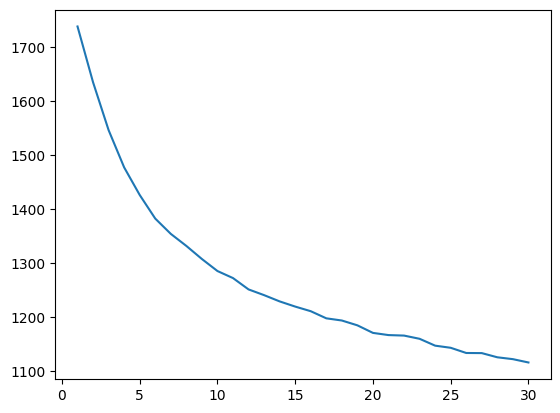

In [ ]:
#Elbow plot for finding optimal no. of clusters
wcss = []
cluster_no = []
for i in range(1,31):
  kmeans = KMeans(n_clusters = i, random_state = 42)
  kmeans.fit(df_combined['embeddings'].tolist())
  wcss.append(kmeans.inertia_)
  cluster_no.append(i)

sns.lineplot(x = cluster_no, y = wcss)

In [ ]:
#KMeans clustering
def Kmeans_clustering(df, text_col):
  kmeans = KMeans(n_clusters = 5, random_state = 42)
  cluster_labels = kmeans.fit_predict(df[text_col].tolist())
  return cluster_labels

In [ ]:
cluster_labels_kmeans = Kmeans_clustering(df_combined, 'embeddings')
cluster_labels_kmeans

array([2, 2, 2, ..., 4, 2, 3], dtype=int32)

In [ ]:
def cluster_tsne_fit(df, text_col):
  embeddings_array = np.array(df[text_col].tolist())
  tsne = TSNE(n_components = 2, verbose = 1, random_state = 42)
  z = tsne.fit_transform(embeddings_array)
  return z

In [ ]:
def cluster_visualization(cluster_labels, z ):
  df = pd.DataFrame()
  df['y'] = cluster_labels
  df['component_1'] = z[:, 0]
  df['component_2'] = z[:, 1]

  sns.scatterplot(x = 'component_1', y = 'component_2', hue = df.y.tolist(), palette = sns.color_palette('hls', 6), data = df).set(title = 't-sne visualization of kmeans clusters')
  return

In [ ]:
z = cluster_tsne_fit(df_combined, 'embeddings')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2225 samples in 0.001s...
[t-SNE] Computed neighbors for 2225 samples in 0.278s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2225
[t-SNE] Computed conditional probabilities for sample 2000 / 2225
[t-SNE] Computed conditional probabilities for sample 2225 / 2225
[t-SNE] Mean sigma: 0.329660
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.542664
[t-SNE] KL divergence after 1000 iterations: 0.943363


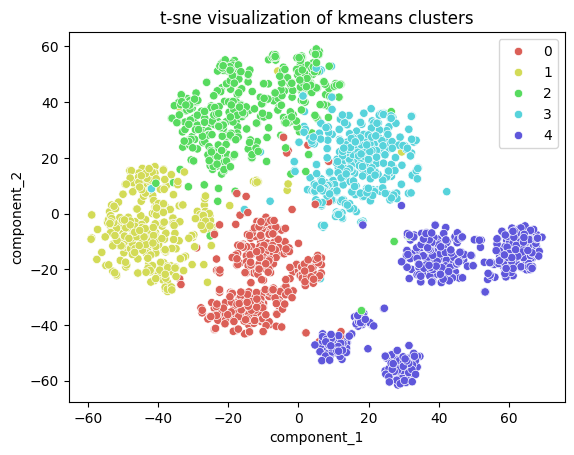

In [ ]:
cluster_visualization(cluster_labels_kmeans , z)

In [ ]:
def evaluate(df, text_col, cluster_labels):
  silhouette_sc = silhouette_score(df[text_col].tolist(), cluster_labels)
  return silhouette_sc

In [ ]:
dunn_index = calculate_dunn_index(df_combined['embeddings'].tolist(), cluster_labels_kmeans)
print("Dunn Index:", dunn_index)

Dunn Index: 25.271334043154127


In [ ]:
#KMedoids Clustering
def Kmedoids_clustering(df, text_col):
  kmedoids = KMedoids(n_clusters = 5, random_state = 42)
  cluster_labels = kmedoids.fit_predict(df[text_col].tolist())
  return cluster_labels

In [ ]:
cluster_labels_kmedoids = Kmedoids_clustering(df_combined, 'embeddings')
cluster_labels_kmedoids

array([3, 0, 0, ..., 4, 2, 1])

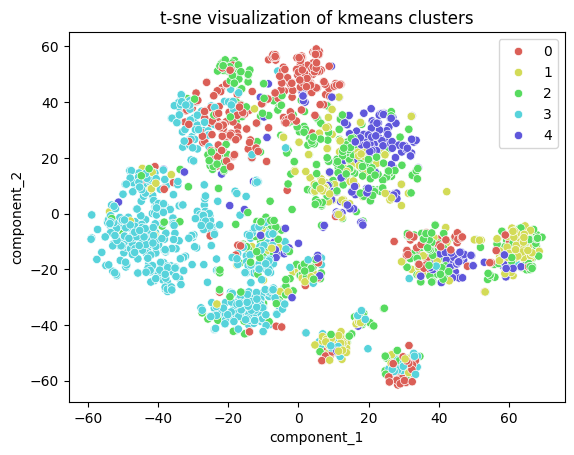

In [ ]:
cluster_visualization(cluster_labels_kmedoids, z)

In [ ]:
dunn_index = calculate_dunn_index(df_combined['embeddings'].tolist(), cluster_labels_kmedoids)
print("Dunn Index:", dunn_index)

Dunn Index: 15.869150891548557


In [ ]:
#Finding optimal value of epsilon
def find_optimal_epsilon(df, text_col):
  nn = NearestNeighbors()
  neighbors_fit = nn.fit(df[text_col].tolist())
  distances, indices =neighbors_fit.kneighbors(df[text_col].tolist())
  distances = np.sort(distances, axis = 0)
  distances = distances[: , 1]
  #plt.figure(figsize = (10,20))
  plt.plot(distances)
  plt.title('K-distance graph')
  plt.xlabel('Data points sorted by distance')
  plt.ylabel('Epsilon')
  return

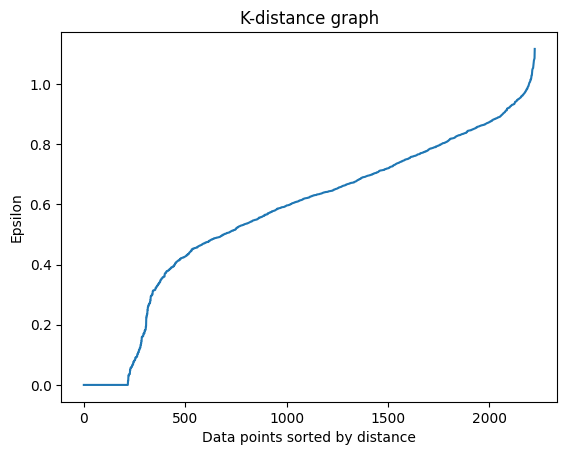

In [ ]:
find_optimal_epsilon(df_combined, 'embeddings')

In [ ]:
#DBSCAN Clustering
def dbscan_clustering(df, text_col):
  dbscan = DBSCAN(eps = 0.6, min_samples = 10)
  cluster_labels = dbscan.fit_predict(df[text_col].tolist())
  return cluster_labels

In [ ]:
cluster_labels_dbscan = dbscan_clustering(df_combined, 'embeddings')
cluster_labels_dbscan

array([-1, -1, -1, ..., -1, -1, -1])

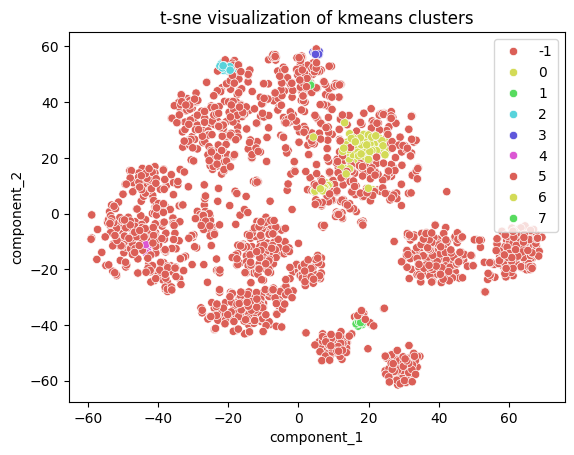

In [ ]:
cluster_visualization(cluster_labels_dbscan, z)

In [ ]:
dunn_index = calculate_dunn_index(df_combined['embeddings'].tolist(), cluster_labels_dbscan)
print("Dunn Index:", dunn_index)

Dunn Index: 2.283193466490904


In [ ]:
#Hierarchical Clustering
def hierarchical_clustering(df, text_col):
  hierarchical = AgglomerativeClustering(n_clusters=5, affinity='euclidean')
  cluster_labels = hierarchical.fit_predict(df[text_col].tolist())
  return cluster_labels

In [ ]:
cluster_labels_hierarchical = hierarchical_clustering(df_combined, 'embeddings')

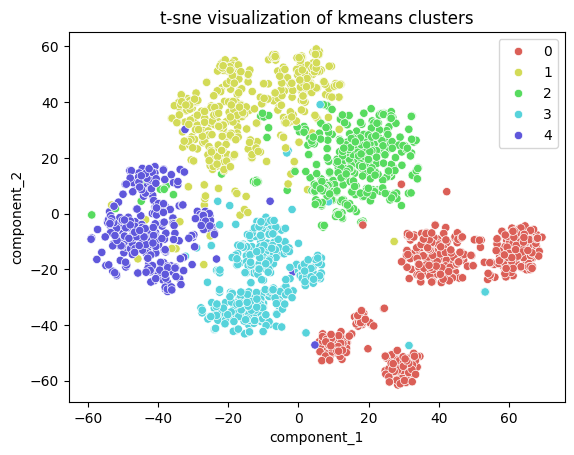

In [ ]:
cluster_visualization(cluster_labels_hierarchical, z)

In [ ]:
dunn_index = calculate_dunn_index(df_combined['embeddings'].tolist(), cluster_labels_hierarchical)
print("Dunn Index:", dunn_index)

Dunn Index: 25.29056478444125
